In [1]:
using Revise
using HierarchicalDA
using LinearAlgebra
using OrdinaryDiffEq

Precompiling HierarchicalDA
  ✓ HierarchicalDA
  1 dependency successfully precompiled in 15 seconds. 495 already precompiled.


In [2]:
using CairoMakie
using LaTeXStrings

In [5]:
# Fix model parameters
y = 0.5 # observational data 
σ² = 10^(-2) # noise variance 
i = 4

## Selecion of hyper-prior parameters
# power parameter
r_range = [ 1.0, .5, -.5, -1.0 ]; 
r = r_range[i] # select parameter 
# shape parameter
β_range = [ 1.501, 3.0918, 2.0165, 1.0017 ]; 
β = β_range[i] # shape parameter
# rate parameters 
ϑ_range = [ 5*10^(-2), 5.9323*10^(-3), 1.2583*10^(-3), 1.2308*10^(-4) ]; 
ϑ = ϑ_range[i]

dist = GeneralizedGamma(r, β, ϑ)

GeneralizedGamma{Float64}(
r: -1.0
β: 1.0017
ϑ: 0.00012308
gamma_dist: Distributions.Gamma{Float64}(α=1.0017, θ=1.0)
)


In [23]:
@time flow = FlowTheta(dist)

  0.000252 seconds (426 allocations: 28.406 KiB)


FlowTheta(-1.0, 1.0017, 0.00012308, -2.5017, 0.0, 1000.0, [0.39972818483431266], ODEProblem{Vector{Float64}, Tuple{Int64, Int64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(rhs_theta!), UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}(ODEFunction{true, SciMLBase.AutoSpecialize, typeof(rhs_theta!), UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}(HierarchicalDA.rhs_theta!, UniformScaling{Bool}(true), nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, SciMLBase.DEFAULT_OBSERVED, nothing, nothing), [0.

In [30]:
flow.φ[1]((1.0))[1]

1.5000009635926725

In [31]:
flow(0.1)

1.0049999999954062

In [25]:
updateFlowTheta!(flow, [1.0])

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 34-element Vector{Float64}:
    0.0
    9.999999999999999e-5
    0.0010999999999999998
    0.011099999999999997
    0.11109999999999996
    0.49155255969368244
    0.9776762503619809
    1.8379979757533986
    2.499510634052757
    3.475374725738712
    4.579870624920097
    6.0086502059081415
    7.766032013088541
    ⋮
   86.54617389508556
  109.65924269988591
  138.92813466185177
  175.99437948222467
  222.93690902015135
  282.3888257495229
  357.68500788116603
  453.0492398182141
  573.8311516246445
  726.8063211447982
  920.5563806374207
 1000.0
u: 34-element Vector{Vector{Float64}}:
 [1.0]
 [1.000000005]
 [1.0000006049999999]
 [1.000061605]
 [1.0061716049990597]
 [1.120811925780431]
 [1.477926319232402]
 [2.689137588634569]
 [4.123805731728743]
 [7.039152139822246]
 [11.487655821551014]
 [19.051990827531274]
 [31.15567306836472]
 ⋮
 [3746.0853873276824]
 [6013.513033890939]
 [9651.40466385295]
 [15487.8

In [8]:
r = 0.5

0.5

In [18]:
tspan = (0, 10)
u0 = [0.4]

prob = ODEProblem(rhs_theta!, u0, tspan, [r])

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 10)
u0: 1-element Vector{Float64}:
 0.4

In [19]:
remake(prob, u0 = [1.0])

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 10)
u0: 1-element Vector{Float64}:
 1.0

In [11]:
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 17-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.011099999999999997
  0.07133223054797805
  0.15467185410499
  0.2713130241627328
  0.4172429591502048
  0.6217890664322809
  0.918708006853248
  1.365774814415031
  2.0413687673713357
  3.041530845272371
  4.4927497984033575
  6.583314939277976
  9.581931036763493
 10.0
u: 17-element Vector{Vector{Float64}}:
 [0.4]
 [0.40000003162277475]
 [0.4000038263285174]
 [0.4003893400532035]
 [0.41563514642229094]
 [0.4673678247597546]
 [0.5774841568105409]
 [0.7483697441744515]
 [1.0217855412572672]
 [1.4627815214243844]
 [2.1959877118218625]
 [3.422564530545668]
 [5.441155164301411]
 [8.706812209543969]
 [13.962055203148294]
 [22.39446118817608]
 [23.641676646057135]

In [27]:
typeof(sol) <:ODESolution

true

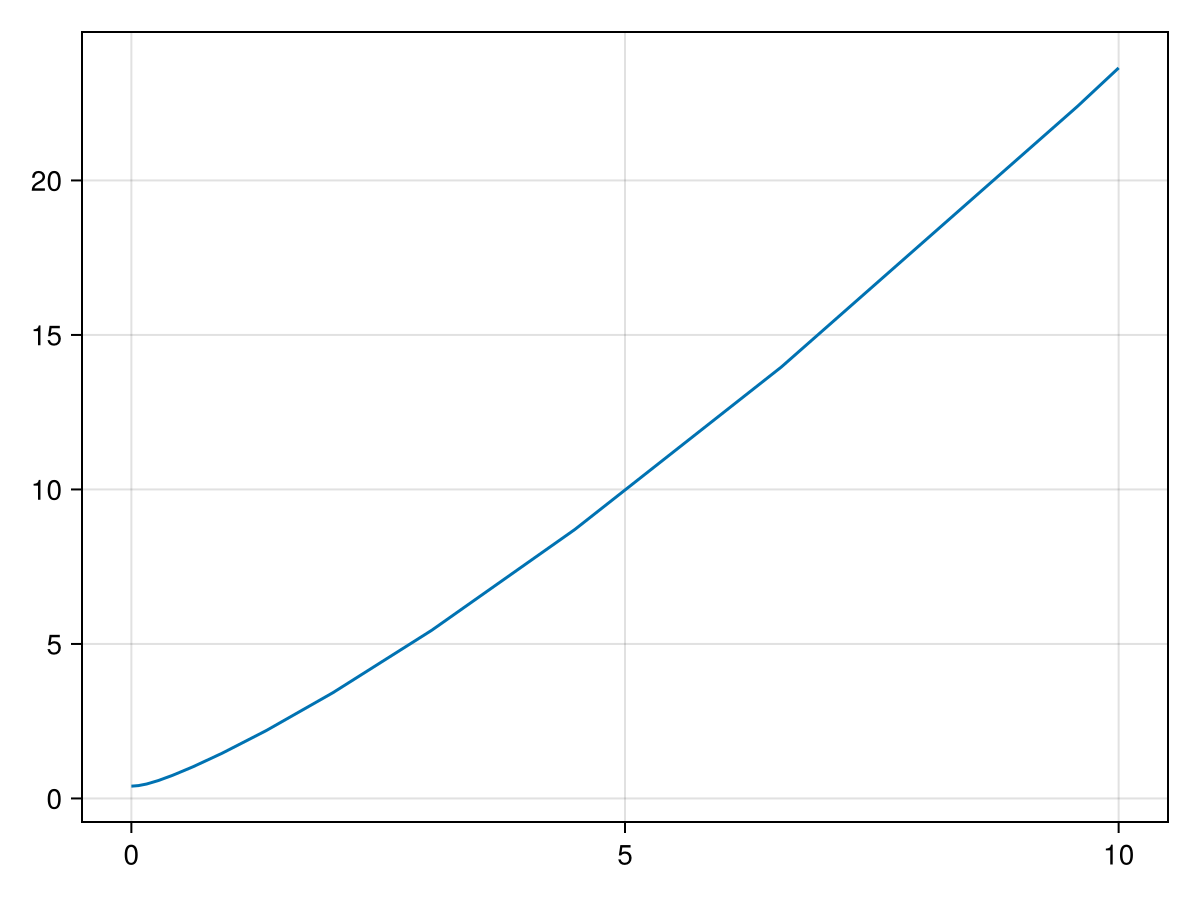

In [24]:
lines(sol.t, vcat(sol.u...))